In [63]:
import sys
sys.path.append('../')

In [64]:
import pathlib
OUT_DIR = pathlib.Path('../out/plots')
if not OUT_DIR.exists():
    OUT_DIR.mkdir()

In [65]:
import numpy
import json
import matplotlib.pyplot as plt

with open('../out/data/run_linear.json', 'r') as file:
    data = json.load(file)

array({'0': 0.18633666629814039, '1': 0.13054174365131718, '2': 0.1216232822199536, '3': 0.11383557737253275, '4': 0.11262770637774923, '5': 0.10803214408409824, '6': 0.10596907527963068, '7': 0.10284054606773291, '8': 0.10305143840563526, '9': 0.1020485541907845, '10': 0.10072144500579044, '11': 0.10055465331882428, '12': 0.09878661417087932, '13': 0.0984283593619705, '14': 0.09593291628132959, '15': 0.09846085950637319, '16': 0.09571078210879283, '17': 0.09666557923244064, '18': 0.09532310571640161, '19': 0.09432532059349072, '20': 0.09318768892698227, '21': 0.09258372265442162, '22': 0.09229168770419564, '23': 0.09427177099285612, '24': 0.09304547252928376, '25': 0.09236037171190711, '26': 0.09208025014514376, '27': 0.09132086291055011, '28': 0.0906268166034085, '29': 0.09011273086071014, '30': 0.0904741361262692, '31': 0.08978002276390222, '32': 0.0917114548527511, '33': 0.09006741453128256, '34': 0.0898017293423604, '35': 0.0895048308239621, '36': 0.08983955347234276, '37': 0.0898

[0.18633667 0.13054174 0.12162328 0.11383558 0.11262771 0.10803214
 0.10596908 0.10284055 0.10305144 0.10204855 0.10072145 0.10055465
 0.09878661 0.09842836 0.09593292 0.09846086 0.09571078 0.09666558
 0.09532311 0.09432532 0.09318769 0.09258372 0.09229169 0.09427177
 0.09304547 0.09236037 0.09208025 0.09132086 0.09062682 0.09011273
 0.09047414 0.08978002 0.09171145 0.09006741 0.08980173 0.08950483
 0.08983955 0.08984707 0.09036231 0.0893911  0.08861325 0.09079689
 0.08789007 0.08786361 0.088769   0.08920932 0.08816218 0.08843218
 0.08854739 0.08772537 0.08815758 0.0883946  0.08751222 0.08845791
 0.08926851 0.0884634  0.08789588 0.08817495 0.08664081 0.08764292
 0.08777681 0.08809745 0.08780932 0.08646831 0.08702139 0.08653263
 0.08688469 0.08545699 0.08806457 0.08631    0.08609019 0.08631644
 0.08579952 0.08881732 0.08656484 0.08601828 0.08491958 0.08641657
 0.08823178 0.08611213 0.08524863 0.08548888 0.08511576 0.08554561
 0.08486042 0.08573617 0.08583752 0.08532277 0.08495898 0.0852

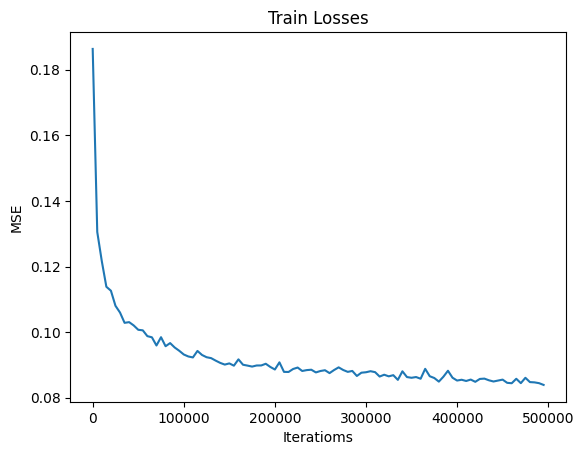

In [70]:
train_losses = numpy.array(list(data['train_losses'].values()))
print(train_losses)
plt.title('Train Losses')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.plot(numpy.arange(0, 100) * 5000, train_losses)
plt.show()

In [ ]:
test_losses = numpy.array(data['test_losses'])


In [ ]:
learning_rates = numpy.array(data['learning_rates'])

In [56]:
import torch
import matplotlib.pyplot as plt

TIME_STEPS = 100
t = torch.linspace(0.0, 1.0, TIME_STEPS)

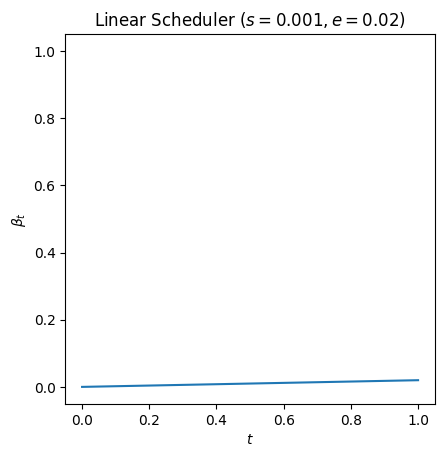

In [57]:
from src.schedule import LinearSchedule
                                
schedule = LinearSchedule(start=0.0001, end=0.02)
plt.xlabel('$t$')
plt.ylabel('$\\beta_t$')
plt.ylim(-0.05, 1.05)
plt.title('Linear Scheduler $(s=0.001, e=0.02)$')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(t, schedule(t))
plt.savefig(OUT_DIR / 'plot-linear.svg', bbox_inches='tight', pad_inches=0)

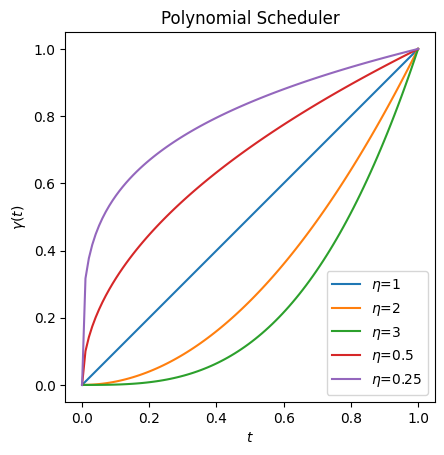

In [58]:
from src.schedule import PolynomialSchedule

variants = [
    { 'tau': 1 },
    { 'tau': 2 },
    { 'tau': 3 },
    { 'tau': 1/2 },
    { 'tau': 1/4 },
]

plt.xlabel('$t$')
plt.ylabel('$\\gamma(t)$')
plt.title('Polynomial Scheduler')
plt.gca().set_aspect('equal', adjustable='box')
for variant in variants:
    schedule = PolynomialSchedule(**variant)
    plt.plot(t, schedule(t), label=f"$\\eta$={variant['tau']}")
plt.legend()
plt.savefig(OUT_DIR / 'plot-polynomial.svg', bbox_inches='tight', pad_inches=0)

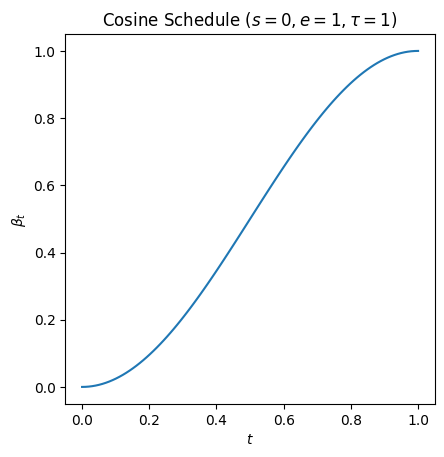

In [59]:
from src.schedule import CosineSchedule

schedule = CosineSchedule(start=0.0, end=1.0, tau=1.0)
plt.xlabel('$t$')
plt.ylabel('$\\beta_t$')
plt.title('Cosine Schedule $(s=0, e=1, \\tau=1)$')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(t, schedule(t))
plt.savefig(OUT_DIR / 'plot-cosine-1.svg', bbox_inches='tight', pad_inches=0)

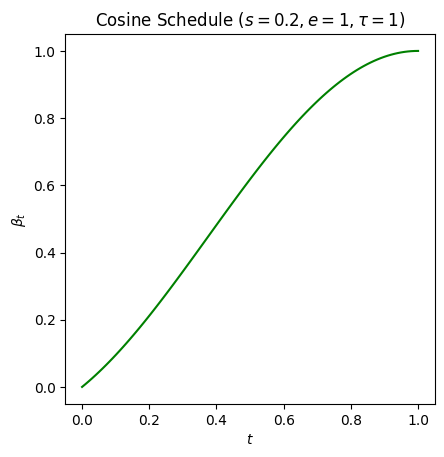

In [60]:
from src.schedule import CosineSchedule

schedule = CosineSchedule(start=0.2, end=1.0, tau=1.0)
plt.xlabel('$t$')
plt.ylabel('$\\beta_t$')
plt.title('Cosine Schedule $(s=0.2, e=1, \\tau=1)$')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(t, schedule(t), color='green')
plt.savefig(OUT_DIR / 'plot-cosine-2.svg', bbox_inches='tight', pad_inches=0)

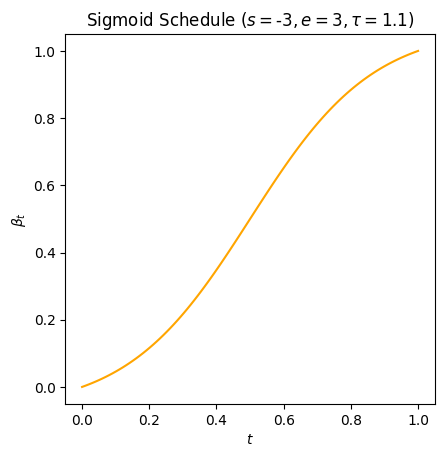

In [61]:
from src.schedule import SigmoidSchedule

schedule = SigmoidSchedule(start=-3, end=3, tau=1.1)
plt.xlabel('$t$')
plt.ylabel('$\\beta_t$')
plt.title('Sigmoid Schedule $(s=$-$3, e=3, \\tau=1.1)$')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(t, schedule(t), color='orange')
plt.savefig(OUT_DIR / 'plot-sigmoid-1.svg', bbox_inches='tight', pad_inches=0)

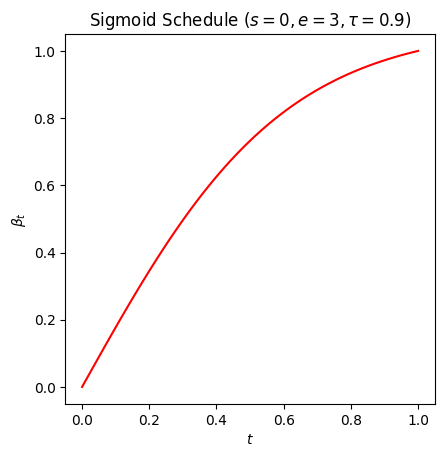

In [62]:
from src.schedule import SigmoidSchedule

schedule = SigmoidSchedule(start=0, end=3, tau=0.9)
plt.xlabel('$t$')
plt.ylabel('$\\beta_t$')
plt.title('Sigmoid Schedule $(s=0, e=3, \\tau=0.9)$')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(t, schedule(t), color='red')
plt.savefig(OUT_DIR / 'plot-sigmoid-2.svg', bbox_inches='tight', pad_inches=0)